In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from scipy import interp

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
from tensorflow.keras import initializers
import warnings
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")
%matplotlib inline 

In [5]:
df = pd.read_excel("kor_etf_data_final.xlsx")
r_df = pd.read_excel("kor_random_data_final.xlsx")

In [6]:
df.head()

,Unnamed: 0,index,date,KOD_p,KBS_p,TIG_p,KOD_v,KBS_v,TIG_v,month,...,month_8,month_9,month_10,month_11,month_12,MON,TUE,WED,THU,FRI
0,0,263,2012-01-25,16513.015625,93433.015625,10870,2836393,2014,21902,1,...,0,0,0,0,0,0,0,1,0,0
1,1,268,2012-02-01,1263.925903,93600.031250,10835,890,2013,6415,2,...,0,0,0,0,0,0,0,1,0,0
2,2,269,2012-02-02,1252.214722,93591.156250,10665,1630,3019,22187,2,...,0,0,0,0,0,0,0,0,1,0
3,3,270,2012-02-03,1198.162109,93617.820313,10570,1960,2263,13551,2,...,0,0,0,0,0,0,0,0,0,1
4,4,272,2012-02-07,16175.183594,93538.734375,10615,1842404,2012,10603,2,...,0,0,0,0,0,0,1,0,0,0


In [7]:
r_df.head()

,Unnamed: 0,index,date,KOD_p,KBS_p,TIG_p,KOD_v,KBS_v,TIG_v,month,...,month_8,month_9,month_10,month_11,month_12,MON,TUE,WED,THU,FRI
0,0,263,2012-01-25,16513.015625,93433.015625,10870,2836393,2014,21902,1,...,0,0,0,0,0,0,0,1,0,0
1,1,268,2012-02-01,1263.925903,93600.031250,10835,890,2013,6415,2,...,0,0,0,0,0,0,0,1,0,0
2,2,269,2012-02-02,1252.214722,93591.156250,10665,1630,3019,22187,2,...,0,0,0,0,0,0,0,0,1,0
3,3,270,2012-02-03,1198.162109,93617.820313,10570,1960,2263,13551,2,...,0,0,0,0,0,0,0,0,0,1
4,4,272,2012-02-07,16175.183594,93538.734375,10615,1842404,2012,10603,2,...,0,0,0,0,0,0,1,0,0,0


In [8]:
df.drop(['Unnamed: 0'], axis = 1, inplace=True)
r_df.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [9]:
print(df.columns)
print(r_df.columns)

Index(['index', 'date', 'KOD_p', 'KBS_p', 'TIG_p', 'KOD_v', 'KBS_v', 'TIG_v',
       'month', 'week',
       ...
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'MON', 'TUE',
       'WED', 'THU', 'FRI'],
      dtype='object', length=108)
Index(['index', 'date', 'KOD_p', 'KBS_p', 'TIG_p', 'KOD_v', 'KBS_v', 'TIG_v',
       'month', 'week',
       ...
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'MON', 'TUE',
       'WED', 'THU', 'FRI'],
      dtype='object', length=108)


In [10]:
df_col = ['KOD', 'KBS', 'TIG']

dummy = ['month_1', 
         'month_2', 
         'month_3', 
         'month_4', 
         'month_5', 
         'month_6', 
         'month_7', 
         'month_8', 
         'month_9',
         'month_10',
         'month_11',
         'month_12',
         'MON', 'TUE','WED', 'THU', 'FRI']

td = [1, 3, 5, 10, 20, 40, 60, 120, 250]

In [11]:
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
lw=2

In [12]:
df.shape

(1867, 108)

In [13]:
r_df.shape

(1867, 108)

In [14]:
df_col

['KOD', 'KBS', 'TIG']

KOD
Real Data & Random Data Processing for horizon =  1
Alpha =  0.1
Instructions for updating:
Use tf.cast instead.
1306/1306 [==============================] - 0s 21us/sample - loss: 0.8638
Alpha =  1.0
1306/1306 [==============================] - 0s 19us/sample - loss: 4.8564
Alpha =  100.0
1306/1306 [==============================] - 0s 24us/sample - loss: 443.9452
Alpha =  1000.0
1306/1306 [==============================] - 0s 18us/sample - loss: 4553.4501
Alpha =  10.0
1306/1306 [==============================] - 0s 25us/sample - loss: 45.2513
Alpha =  0.01
1306/1306 [==============================] - 0s 27us/sample - loss: 0.3315
Alpha =  0.0001
1306/1306 [==============================] - 0s 20us/sample - loss: 0.2510
Alpha =  0.001
1306/1306 [==============================] - 0s 24us/sample - loss: 0.2583
Real Data, horizon 1
AUC good =  0.4581743487993488


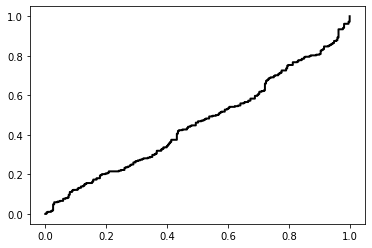

Random Data, horizon 1
AUC good =  0.5344805657305657


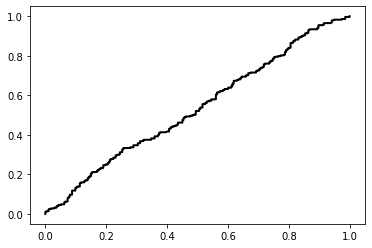

C =  1000.0
Real_data_accuracy   :  0.5045
Random data_accuracy :  0.5258
Gain =  -0.0213
---------------------------------------------

Real Data & Random Data Processing for horizon =  3
Alpha =  0.1
1306/1306 [==============================] - 0s 36us/sample - loss: 0.8660
Alpha =  1.0
1306/1306 [==============================] - 0s 50us/sample - loss: 4.7939
Alpha =  100.0
1306/1306 [==============================] - 0s 29us/sample - loss: 450.6816
Alpha =  1000.0
1306/1306 [==============================] - 0s 25us/sample - loss: 4451.9675
Alpha =  10.0
1306/1306 [==============================] - 0s 23us/sample - loss: 45.2439
Alpha =  0.01
1306/1306 [==============================] - 0s 24us/sample - loss: 0.3309
Alpha =  0.0001
1306/1306 [==============================] - 0s 23us/sample - loss: 0.2508
Alpha =  0.001
1306/1306 [==============================] - 0s 26us/sample - loss: 0.2580
Real Data, horizon 3
AUC good =  0.5466190221406915


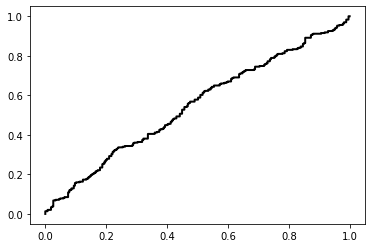

Random Data, horizon 3
AUC good =  0.47076358633340976


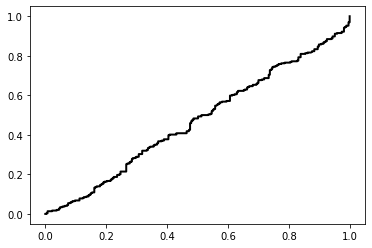

C =  0.01
Real_data_accuracy   :  0.5187
Random data_accuracy :  0.5241
Gain =  -0.0054
---------------------------------------------

Real Data & Random Data Processing for horizon =  5
Alpha =  0.1
1306/1306 [==============================] - 0s 25us/sample - loss: 0.8584
Alpha =  1.0
1306/1306 [==============================] - 0s 27us/sample - loss: 4.7207
Alpha =  100.0
1306/1306 [==============================] - 0s 31us/sample - loss: 450.4039
Alpha =  1000.0
1306/1306 [==============================] - 0s 27us/sample - loss: 4548.5395
Alpha =  10.0
1306/1306 [==============================] - 0s 27us/sample - loss: 46.2186
Alpha =  0.01
1306/1306 [==============================] - 0s 38us/sample - loss: 0.3307
Alpha =  0.0001
1306/1306 [==============================] - 0s 31us/sample - loss: 0.2502
Alpha =  0.001
1306/1306 [==============================] - 0s 24us/sample - loss: 0.2581
Real Data, horizon 5
AUC good =  0.5013433221389821


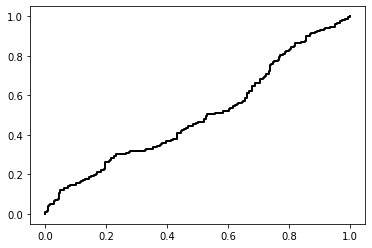

Random Data, horizon 5
AUC good =  0.5379359338672177


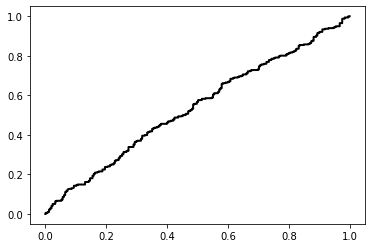

C =  0.01
Real_data_accuracy   :  0.5579
Random data_accuracy :  0.5633
Gain =  -0.0054
---------------------------------------------

Real Data & Random Data Processing for horizon =  10
Alpha =  0.1
1306/1306 [==============================] - 0s 32us/sample - loss: 0.8610
Alpha =  1.0
1306/1306 [==============================] - 0s 28us/sample - loss: 4.7657
Alpha =  100.0
1306/1306 [==============================] - 0s 47us/sample - loss: 453.3866
Alpha =  1000.0
1306/1306 [==============================] - 0s 30us/sample - loss: 4534.7731
Alpha =  10.0
1306/1306 [==============================] - 0s 30us/sample - loss: 46.1556
Alpha =  0.01
1306/1306 [==============================] - 0s 30us/sample - loss: 0.3297
Alpha =  0.0001
1306/1306 [==============================] - 0s 34us/sample - loss: 0.2500
Alpha =  0.001
1306/1306 [==============================] - 0s 31us/sample - loss: 0.2570
Real Data, horizon 10
AUC good =  0.49937570796004527


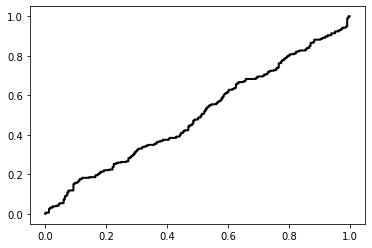

Random Data, horizon 10
AUC good =  0.4534805890227577


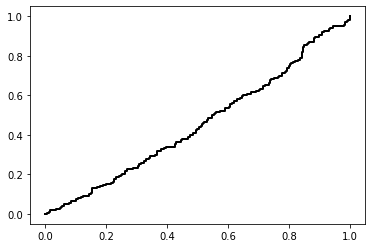

C =  0.001
Real_data_accuracy   :  0.5561
Random data_accuracy :  0.5508
Gain =  0.0053
---------------------------------------------

Real Data & Random Data Processing for horizon =  20
Alpha =  0.1
1306/1306 [==============================] - 0s 36us/sample - loss: 0.8608
Alpha =  1.0
1306/1306 [==============================] - 0s 31us/sample - loss: 4.9070
Alpha =  100.0
1306/1306 [==============================] - 0s 37us/sample - loss: 453.1941
Alpha =  1000.0
1306/1306 [==============================] - 0s 31us/sample - loss: 4526.0648
Alpha =  10.0
1306/1306 [==============================] - 0s 55us/sample - loss: 45.1374
Alpha =  0.01
1306/1306 [==============================] - 0s 36us/sample - loss: 0.3319
Alpha =  0.0001
1306/1306 [==============================] - 0s 34us/sample - loss: 0.2491
Alpha =  0.001
1306/1306 [==============================] - 0s 51us/sample - loss: 0.2573
Real Data, horizon 20
AUC good =  0.5228552803129074


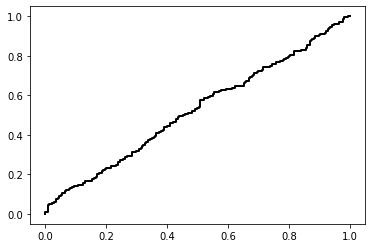

Random Data, horizon 20
AUC good =  0.5190156453715775


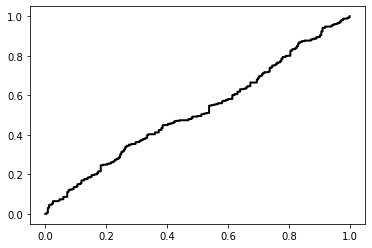

C =  0.001
Real_data_accuracy   :  0.5811
Random data_accuracy :  0.5793
Gain =  0.0018
---------------------------------------------

Real Data & Random Data Processing for horizon =  40
Alpha =  0.1
1306/1306 [==============================] - 0s 42us/sample - loss: 0.8579
Alpha =  1.0
1306/1306 [==============================] - 0s 53us/sample - loss: 4.7606
Alpha =  100.0
1306/1306 [==============================] - 0s 40us/sample - loss: 458.6280
Alpha =  1000.0
1306/1306 [==============================] - 0s 38us/sample - loss: 4436.2373
Alpha =  10.0
1306/1306 [==============================] - 0s 45us/sample - loss: 45.9458
Alpha =  0.01
1306/1306 [==============================] - 0s 45us/sample - loss: 0.3297
Alpha =  0.0001
1306/1306 [==============================] - 0s 49us/sample - loss: 0.2500
Alpha =  0.001
1306/1306 [==============================] - 0s 99us/sample - loss: 0.2567
Real Data, horizon 40
AUC good =  0.4837137609864883


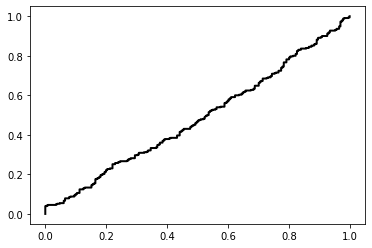

Random Data, horizon 40
AUC good =  0.4578774760592943


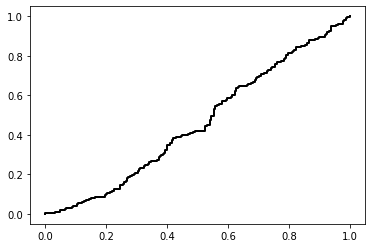

C =  0.01
Real_data_accuracy   :  0.5882
Random data_accuracy :  0.5793
Gain =  0.0089
---------------------------------------------

Real Data & Random Data Processing for horizon =  60
Alpha =  0.1
1306/1306 [==============================] - 0s 46us/sample - loss: 0.8547
Alpha =  1.0
1306/1306 [==============================] - 0s 55us/sample - loss: 4.7735
Alpha =  100.0
1306/1306 [==============================] - 0s 48us/sample - loss: 453.6128
Alpha =  1000.0
1306/1306 [==============================] - 0s 53us/sample - loss: 4487.4574
Alpha =  10.0
1306/1306 [==============================] - 0s 69us/sample - loss: 45.4300
Alpha =  0.01
1306/1306 [==============================] - 0s 52us/sample - loss: 0.3277
Alpha =  0.0001
1306/1306 [==============================] - 0s 52us/sample - loss: 0.2487
Alpha =  0.001
1306/1306 [==============================] - 0s 53us/sample - loss: 0.2546
Real Data, horizon 60
AUC good =  0.6162168668253671


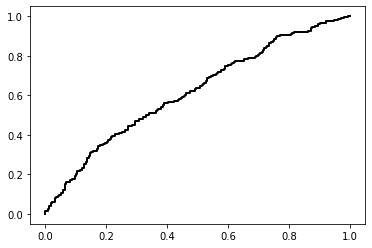

Random Data, horizon 60
AUC good =  0.538743413485971


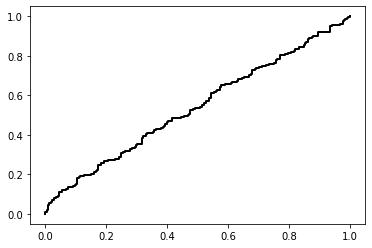

C =  1000.0
Real_data_accuracy   :  0.6114
Random data_accuracy :  0.6114
Gain =  0.0
---------------------------------------------

Real Data & Random Data Processing for horizon =  120
Alpha =  0.1
1306/1306 [==============================] - 0s 57us/sample - loss: 0.8553
Alpha =  1.0
1306/1306 [==============================] - 0s 70us/sample - loss: 4.6962
Alpha =  100.0
1306/1306 [==============================] - 0s 53us/sample - loss: 458.7787
Alpha =  1000.0
1306/1306 [==============================] - 0s 57us/sample - loss: 4511.5405
Alpha =  10.0
1306/1306 [==============================] - 0s 58us/sample - loss: 45.5413
Alpha =  0.01
1306/1306 [==============================] - 0s 57us/sample - loss: 0.3306
Alpha =  0.0001
1306/1306 [==============================] - 0s 60us/sample - loss: 0.2489
Alpha =  0.001
1306/1306 [==============================] - 0s 58us/sample - loss: 0.2559
Real Data, horizon 120
AUC good =  0.6047181438216698


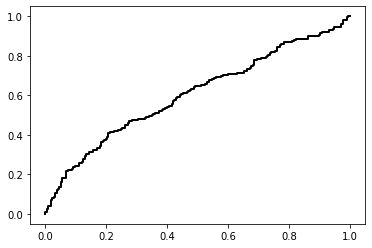

Random Data, horizon 120
AUC good =  0.454901671846533


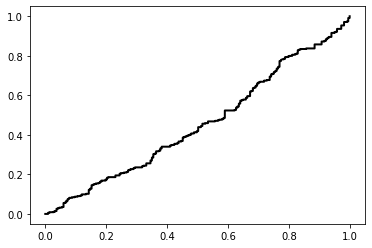

C =  1.0
Real_data_accuracy   :  0.6132
Random data_accuracy :  0.6132
Gain =  0.0
---------------------------------------------

Real Data & Random Data Processing for horizon =  250
Alpha =  0.1
1306/1306 [==============================] - 0s 57us/sample - loss: 0.8594
Alpha =  1.0
1306/1306 [==============================] - 0s 73us/sample - loss: 4.7652
Alpha =  100.0
1306/1306 [==============================] - 0s 88us/sample - loss: 446.4928
Alpha =  1000.0
1306/1306 [==============================] - 0s 69us/sample - loss: 4477.3794
Alpha =  10.0
1306/1306 [==============================] - 0s 68us/sample - loss: 46.0465
Alpha =  0.01
1306/1306 [==============================] - 0s 69us/sample - loss: 0.3284
Alpha =  0.0001
1306/1306 [==============================] - 0s 64us/sample - loss: 0.2488
Alpha =  0.001
1306/1306 [==============================] - 0s 69us/sample - loss: 0.2560
Real Data, horizon 250
AUC good =  0.6185221234282108


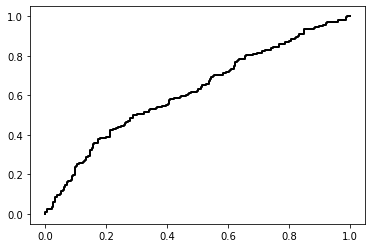

Random Data, horizon 250
AUC good =  0.38454253696006735


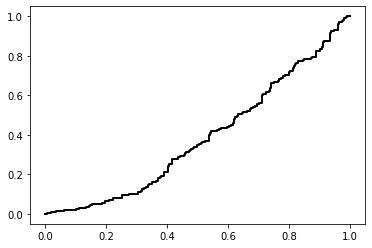

C =  0.01
Real_data_accuracy   :  0.5918
Random data_accuracy :  0.5918
Gain =  0.0
---------------------------------------------

KBS
Real Data & Random Data Processing for horizon =  1
Alpha =  0.1
1306/1306 [==============================] - 0s 65us/sample - loss: 0.8617
Alpha =  1.0
1306/1306 [==============================] - 0s 68us/sample - loss: 4.7305
Alpha =  100.0
1306/1306 [==============================] - 0s 74us/sample - loss: 448.3253
Alpha =  1000.0
1306/1306 [==============================] - 0s 78us/sample - loss: 4522.7631
Alpha =  10.0
1306/1306 [==============================] - 0s 78us/sample - loss: 44.5445
Alpha =  0.01
1306/1306 [==============================] - 0s 73us/sample - loss: 0.3310
Alpha =  0.0001
1306/1306 [==============================] - 0s 76us/sample - loss: 0.2508
Alpha =  0.001
1306/1306 [==============================] - 0s 76us/sample - loss: 0.2582
Real Data, horizon 1
AUC good =  0.5251930031547359


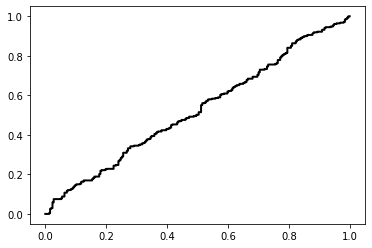

Random Data, horizon 1
AUC good =  0.509380851009259


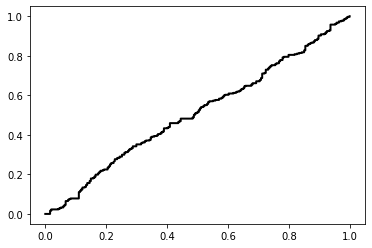

C =  1000.0
Real_data_accuracy   :  0.5455
Random data_accuracy :  0.5472
Gain =  -0.0017
---------------------------------------------

Real Data & Random Data Processing for horizon =  3
Alpha =  0.1
1306/1306 [==============================] - 0s 79us/sample - loss: 0.8580
Alpha =  1.0
1306/1306 [==============================] - 0s 74us/sample - loss: 4.7402
Alpha =  100.0
1306/1306 [==============================] - 0s 77us/sample - loss: 455.8661
Alpha =  1000.0
1306/1306 [==============================] - 0s 78us/sample - loss: 4616.1374
Alpha =  10.0
1306/1306 [==============================] - 0s 76us/sample - loss: 45.6311
Alpha =  0.01
1306/1306 [==============================] - 0s 86us/sample - loss: 0.3292
Alpha =  0.0001
1306/1306 [==============================] - 0s 75us/sample - loss: 0.2470
Alpha =  0.001
1306/1306 [==============================] - 0s 80us/sample - loss: 0.2558
Real Data, horizon 3
AUC good =  0.5130055401662049


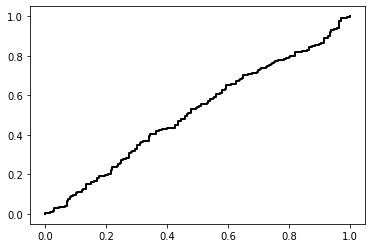

Random Data, horizon 3
AUC good =  0.4472437673130194


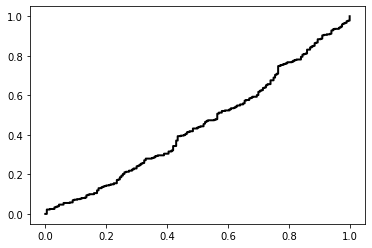

C =  1.0
Real_data_accuracy   :  0.6435
Random data_accuracy :  0.6435
Gain =  0.0
---------------------------------------------

Real Data & Random Data Processing for horizon =  5
Alpha =  0.1
1306/1306 [==============================] - 0s 83us/sample - loss: 0.8422
Alpha =  1.0
1306/1306 [==============================] - 0s 87us/sample - loss: 4.8541
Alpha =  100.0
1306/1306 [==============================] - 0s 88us/sample - loss: 454.8430
Alpha =  1000.0
1306/1306 [==============================] - 0s 88us/sample - loss: 4541.1970
Alpha =  10.0
1306/1306 [==============================] - 0s 112us/sample - loss: 44.4929
Alpha =  0.01
1306/1306 [==============================] - 0s 96us/sample - loss: 0.3270
Alpha =  0.0001
1306/1306 [==============================] - 0s 89us/sample - loss: 0.2458
Alpha =  0.001
1306/1306 [==============================] - 0s 90us/sample - loss: 0.2519
Real Data, horizon 5
AUC good =  0.5068606007582386


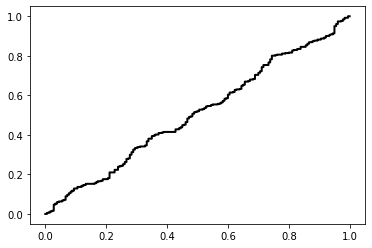

Random Data, horizon 5
AUC good =  0.6403834937299504


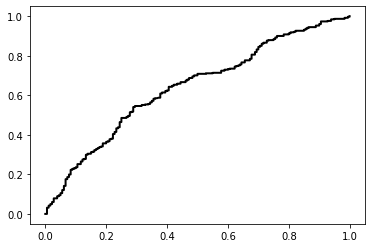

C =  0.1
Real_data_accuracy   :  0.6791
Random data_accuracy :  0.6791
Gain =  0.0
---------------------------------------------

Real Data & Random Data Processing for horizon =  10
Alpha =  0.1
1306/1306 [==============================] - 0s 99us/sample - loss: 0.8530
Alpha =  1.0
1306/1306 [==============================] - 0s 89us/sample - loss: 4.7723
Alpha =  100.0
1306/1306 [==============================] - 0s 96us/sample - loss: 459.8430
Alpha =  1000.0
1306/1306 [==============================] - 0s 92us/sample - loss: 4459.2492
Alpha =  10.0
1306/1306 [==============================] - 0s 99us/sample - loss: 46.6303
Alpha =  0.01
1306/1306 [==============================] - 0s 95us/sample - loss: 0.3225
Alpha =  0.0001
1306/1306 [==============================] - 0s 112us/sample - loss: 0.2448
Alpha =  0.001
1306/1306 [==============================] - 0s 95us/sample - loss: 0.2522
Real Data, horizon 10
AUC good =  0.5296524748006619


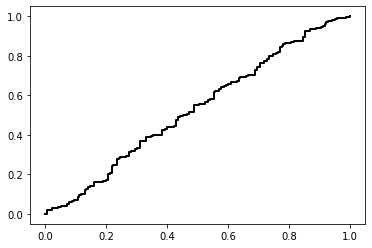

Random Data, horizon 10
AUC good =  0.5519407251391606


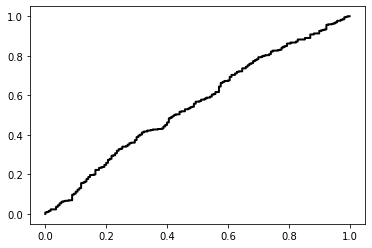

C =  0.01
Real_data_accuracy   :  0.697
Random data_accuracy :  0.697
Gain =  0.0
---------------------------------------------

Real Data & Random Data Processing for horizon =  20
Alpha =  0.1
1306/1306 [==============================] - 0s 99us/sample - loss: 0.8516
Alpha =  1.0
1306/1306 [==============================] - 0s 102us/sample - loss: 4.7426
Alpha =  100.0
1306/1306 [==============================] - 0s 97us/sample - loss: 455.6460
Alpha =  1000.0
1306/1306 [==============================] - 0s 102us/sample - loss: 4557.2202
Alpha =  10.0
1306/1306 [==============================] - 0s 101us/sample - loss: 45.2008
Alpha =  0.01
1306/1306 [==============================] - 0s 103us/sample - loss: 0.3191
Alpha =  0.0001
1306/1306 [==============================] - 0s 102us/sample - loss: 0.2369
Alpha =  0.001
1306/1306 [==============================] - 0s 102us/sample - loss: 0.2455
Real Data, horizon 20
AUC good =  0.38332149831350965


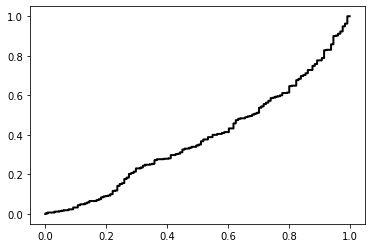

Random Data, horizon 20
AUC good =  0.6585833481271082


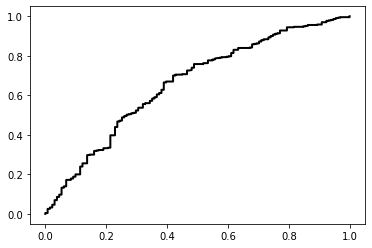

C =  1000.0
Real_data_accuracy   :  0.7665
Random data_accuracy :  0.7665
Gain =  0.0
---------------------------------------------

Real Data & Random Data Processing for horizon =  40
Alpha =  0.1
1306/1306 [==============================] - 0s 111us/sample - loss: 0.8501
Alpha =  1.0
1306/1306 [==============================] - 0s 117us/sample - loss: 4.7399
Alpha =  100.0
1306/1306 [==============================] - 0s 111us/sample - loss: 445.8805
Alpha =  1000.0
1306/1306 [==============================] - 0s 107us/sample - loss: 4467.1858
Alpha =  10.0
1306/1306 [==============================] - 0s 108us/sample - loss: 46.3776
Alpha =  0.01
1306/1306 [==============================] - 0s 113us/sample - loss: 0.3168
Alpha =  0.0001
1306/1306 [==============================] - 0s 116us/sample - loss: 0.2330
Alpha =  0.001
1306/1306 [==============================] - 0s 115us/sample - loss: 0.2418
Real Data, horizon 40
AUC good =  0.5210128495842781


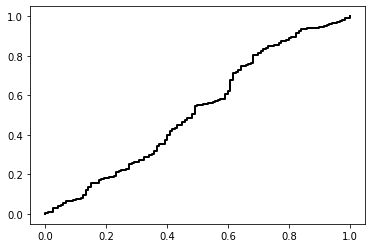

Random Data, horizon 40
AUC good =  0.6233938019652306


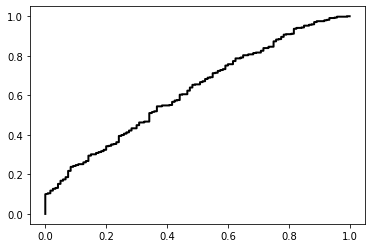

C =  10.0
Real_data_accuracy   :  0.7861
Random data_accuracy :  0.7861
Gain =  0.0
---------------------------------------------

Real Data & Random Data Processing for horizon =  60
Alpha =  0.1
1306/1306 [==============================] - 0s 113us/sample - loss: 0.8389
Alpha =  1.0
1306/1306 [==============================] - 0s 114us/sample - loss: 4.7757
Alpha =  100.0
1306/1306 [==============================] - 0s 115us/sample - loss: 451.4472
Alpha =  1000.0
1306/1306 [==============================] - 0s 118us/sample - loss: 4548.6454
Alpha =  10.0
1306/1306 [==============================] - 0s 117us/sample - loss: 46.1010
Alpha =  0.01
1306/1306 [==============================] - 0s 116us/sample - loss: 0.3122
Alpha =  0.0001
1306/1306 [==============================] - 0s 119us/sample - loss: 0.2293
Alpha =  0.001
1306/1306 [==============================] - 0s 123us/sample - loss: 0.2362
Real Data, horizon 60
AUC good =  0.43639093374660987


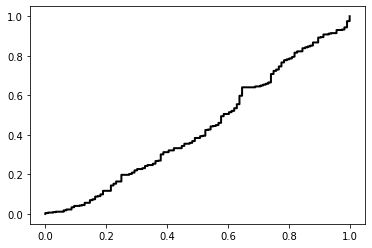

Random Data, horizon 60
AUC good =  0.5343858969391708


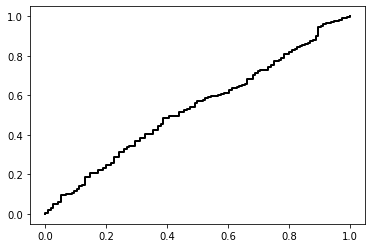

C =  0.001
Real_data_accuracy   :  0.7932
Random data_accuracy :  0.7932
Gain =  0.0
---------------------------------------------

Real Data & Random Data Processing for horizon =  120
Alpha =  0.1
1306/1306 [==============================] - 0s 121us/sample - loss: 0.8441
Alpha =  1.0
1306/1306 [==============================] - 0s 126us/sample - loss: 4.8262
Alpha =  100.0
1306/1306 [==============================] - 0s 120us/sample - loss: 457.5410
Alpha =  1000.0
1306/1306 [==============================] - 0s 123us/sample - loss: 4460.0404
Alpha =  10.0
1306/1306 [==============================] - 0s 123us/sample - loss: 46.2564
Alpha =  0.01
1306/1306 [==============================] - 0s 129us/sample - loss: 0.3102
Alpha =  0.0001
1306/1306 [==============================] - 0s 121us/sample - loss: 0.2311
Alpha =  0.001
1306/1306 [==============================] - 0s 130us/sample - loss: 0.2377
Real Data, horizon 120
AUC good =  0.43817483623221143


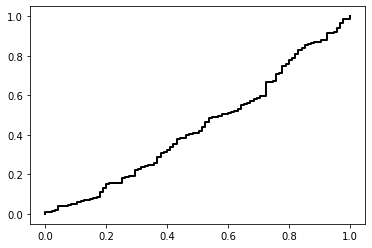

Random Data, horizon 120
AUC good =  0.6275016941495369


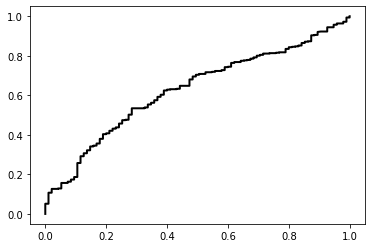

C =  0.0001
Real_data_accuracy   :  0.8307
Random data_accuracy :  0.8307
Gain =  0.0
---------------------------------------------

Real Data & Random Data Processing for horizon =  250
Alpha =  0.1
1306/1306 [==============================] - 0s 132us/sample - loss: 0.8285
Alpha =  1.0
1306/1306 [==============================] - 0s 135us/sample - loss: 4.6969
Alpha =  100.0
1306/1306 [==============================] - 0s 139us/sample - loss: 440.0560
Alpha =  1000.0
1306/1306 [==============================] - 0s 143us/sample - loss: 4514.2495
Alpha =  10.0
1306/1306 [==============================] - 0s 140us/sample - loss: 45.5617
Alpha =  0.01
1306/1306 [==============================] - 0s 140us/sample - loss: 0.2952
Alpha =  0.0001
1306/1306 [==============================] - 0s 160us/sample - loss: 0.2144
Alpha =  0.001
1306/1306 [==============================] - 0s 139us/sample - loss: 0.2201
Real Data, horizon 250
AUC good =  0.3895133505598622


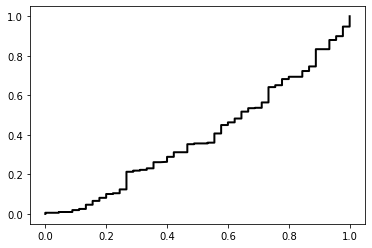

Random Data, horizon 250
AUC good =  0.6378122308354868


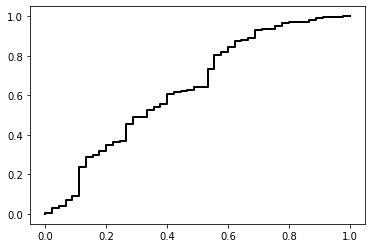

C =  0.001
Real_data_accuracy   :  0.9198
Random data_accuracy :  0.9198
Gain =  0.0
---------------------------------------------

TIG
Real Data & Random Data Processing for horizon =  1
Alpha =  0.1
1306/1306 [==============================] - 0s 139us/sample - loss: 0.8571
Alpha =  1.0
1306/1306 [==============================] - 0s 176us/sample - loss: 4.8143
Alpha =  100.0
1306/1306 [==============================] - 0s 139us/sample - loss: 443.3019
Alpha =  1000.0
1306/1306 [==============================] - ETA: 0s - loss: 4486.59 - 0s 141us/sample - loss: 4486.5952
Alpha =  10.0
1306/1306 [==============================] - 0s 142us/sample - loss: 46.3514
Alpha =  0.01
1306/1306 [==============================] - 0s 167us/sample - loss: 0.3323
Alpha =  0.0001
1306/1306 [==============================] - 0s 146us/sample - loss: 0.2509
Alpha =  0.001
1306/1306 [==============================] - 0s 151us/sample - loss: 0.2581
Real Data, horizon 1
AUC good =  0.49771015672705066


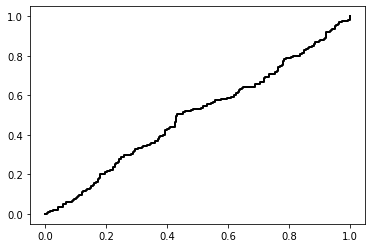

Random Data, horizon 1
AUC good =  0.4708617443517199


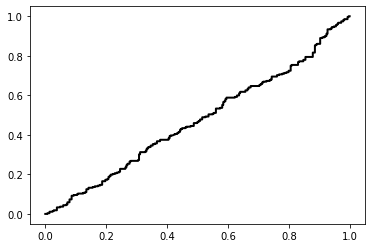

C =  0.001
Real_data_accuracy   :  0.5134
Random data_accuracy :  0.4581
Gain =  0.0553
---------------------------------------------

Real Data & Random Data Processing for horizon =  3
Alpha =  0.1
1306/1306 [==============================] - 0s 146us/sample - loss: 0.8621
Alpha =  1.0
1306/1306 [==============================] - 0s 147us/sample - loss: 4.7646
Alpha =  100.0
1306/1306 [==============================] - 0s 145us/sample - loss: 462.0217
Alpha =  1000.0
1306/1306 [==============================] - 0s 150us/sample - loss: 4553.8178
Alpha =  10.0
1306/1306 [==============================] - 0s 149us/sample - loss: 45.3631
Alpha =  0.01
1306/1306 [==============================] - 0s 150us/sample - loss: 0.3328
Alpha =  0.0001
1306/1306 [==============================] - 0s 189us/sample - loss: 0.2508
Alpha =  0.001
1306/1306 [==============================] - 0s 148us/sample - loss: 0.2583
Real Data, horizon 3
AUC good =  0.4445603766382491


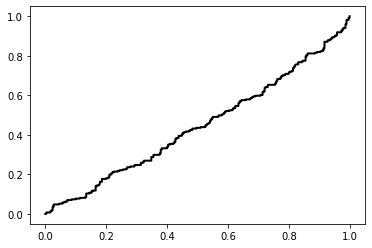

Random Data, horizon 3
AUC good =  0.538401832294185


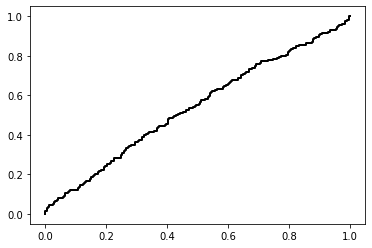

C =  1000.0
Real_data_accuracy   :  0.4742
Random data_accuracy :  0.4902
Gain =  -0.016
---------------------------------------------

Real Data & Random Data Processing for horizon =  5
Alpha =  0.1
1306/1306 [==============================] - 0s 170us/sample - loss: 0.8628
Alpha =  1.0
1306/1306 [==============================] - 0s 143us/sample - loss: 4.7072
Alpha =  100.0
1306/1306 [==============================] - 0s 186us/sample - loss: 453.9020
Alpha =  1000.0
1306/1306 [==============================] - 0s 203us/sample - loss: 4504.9862
Alpha =  10.0
1306/1306 [==============================] - 0s 158us/sample - loss: 45.4075
Alpha =  0.01
1306/1306 [==============================] - 0s 151us/sample - loss: 0.3308
Alpha =  0.0001
1306/1306 [==============================] - 0s 158us/sample - loss: 0.2506
Alpha =  0.001
1306/1306 [==============================] - 0s 160us/sample - loss: 0.2584
Real Data, horizon 5
AUC good =  0.5278641519051867


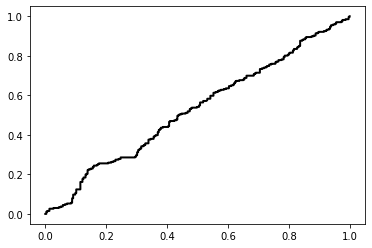

Random Data, horizon 5
AUC good =  0.6188097362049191


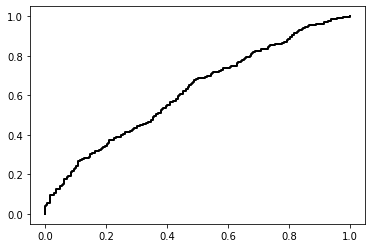

C =  0.01
Real_data_accuracy   :  0.5455
Random data_accuracy :  0.5276
Gain =  0.0179
---------------------------------------------

Real Data & Random Data Processing for horizon =  10
Alpha =  0.1
1306/1306 [==============================] - 0s 160us/sample - loss: 0.8612
Alpha =  1.0
1306/1306 [==============================] - 0s 181us/sample - loss: 4.7539
Alpha =  100.0
1306/1306 [==============================] - 0s 163us/sample - loss: 449.7981
Alpha =  1000.0
1306/1306 [==============================] - 0s 177us/sample - loss: 4569.2975
Alpha =  10.0
1306/1306 [==============================] - 0s 175us/sample - loss: 45.5972 - loss:
Alpha =  0.01
1306/1306 [==============================] - 0s 199us/sample - loss: 0.3304
Alpha =  0.0001
1306/1306 [==============================] - 0s 245us/sample - loss: 0.2498
Alpha =  0.001
1306/1306 [==============================] - 0s 232us/sample - loss: 0.2580
Real Data, horizon 10
AUC good =  0.6556976211094696


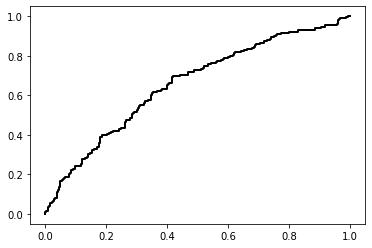

Random Data, horizon 10
AUC good =  0.44280729458509505


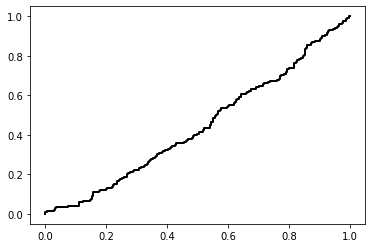

C =  0.0001
Real_data_accuracy   :  0.5312
Random data_accuracy :  0.4884
Gain =  0.0428
---------------------------------------------

Real Data & Random Data Processing for horizon =  20
Alpha =  0.1
1306/1306 [==============================] - 0s 189us/sample - loss: 0.8618
Alpha =  1.0
1306/1306 [==============================] - 0s 199us/sample - loss: 4.7829
Alpha =  100.0
1306/1306 [==============================] - 0s 195us/sample - loss: 446.0912
Alpha =  1000.0
1306/1306 [==============================] - 0s 197us/sample - loss: 4519.0963
Alpha =  10.0
1306/1306 [==============================] - 0s 200us/sample - loss: 44.8897
Alpha =  0.01
1306/1306 [==============================] - 0s 200us/sample - loss: 0.3310
Alpha =  0.0001
1306/1306 [==============================] - 0s 230us/sample - loss: 0.2507
Alpha =  0.001
1306/1306 [==============================] - 0s 185us/sample - loss: 0.2583
Real Data, horizon 20
AUC good =  0.4442022169115778


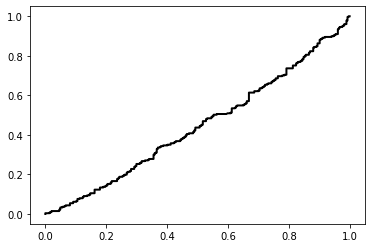

Random Data, horizon 20
AUC good =  0.359307469364926


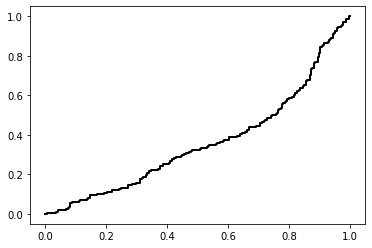

C =  0.001
Real_data_accuracy   :  0.4759
Random data_accuracy :  0.4848
Gain =  -0.0089
---------------------------------------------

Real Data & Random Data Processing for horizon =  40
Alpha =  0.1
1306/1306 [==============================] - 0s 195us/sample - loss: 0.8562
Alpha =  1.0
1306/1306 [==============================] - 0s 192us/sample - loss: 4.8126
Alpha =  100.0
1306/1306 [==============================] - 0s 188us/sample - loss: 454.0625
Alpha =  1000.0
1306/1306 [==============================] - 0s 198us/sample - loss: 4537.4733
Alpha =  10.0
1306/1306 [==============================] - 0s 191us/sample - loss: 44.9894
Alpha =  0.01
1306/1306 [==============================] - 0s 185us/sample - loss: 0.3308
Alpha =  0.0001
1306/1306 [==============================] - 0s 197us/sample - loss: 0.2505
Alpha =  0.001
1306/1306 [==============================] - 0s 206us/sample - loss: 0.2582
Real Data, horizon 40
AUC good =  0.4911781156251589


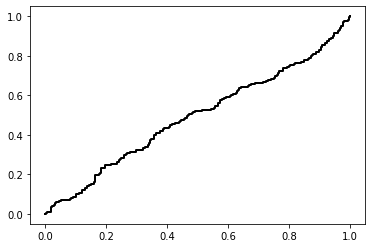

Random Data, horizon 40
AUC good =  0.5301329638480704


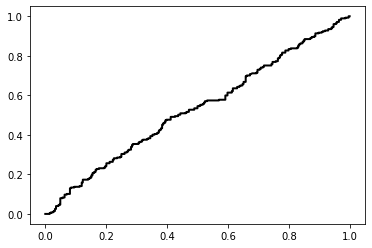

C =  1000.0
Real_data_accuracy   :  0.4813
Random data_accuracy :  0.533
Gain =  -0.0517
---------------------------------------------

Real Data & Random Data Processing for horizon =  60
Alpha =  0.1
1306/1306 [==============================] - 0s 217us/sample - loss: 0.8527
Alpha =  1.0
1306/1306 [==============================] - 0s 202us/sample - loss: 4.7633
Alpha =  100.0
1306/1306 [==============================] - 0s 190us/sample - loss: 455.0239
Alpha =  1000.0
1306/1306 [==============================] - 0s 197us/sample - loss: 4504.5975
Alpha =  10.0
1306/1306 [==============================] - 0s 199us/sample - loss: 46.0268
Alpha =  0.01
1306/1306 [==============================] - 0s 203us/sample - loss: 0.3308
Alpha =  0.0001
1306/1306 [==============================] - 0s 208us/sample - loss: 0.2507s - loss: 0.25
Alpha =  0.001
1306/1306 [==============================] - 0s 205us/sample - loss: 0.2588
Real Data, horizon 60
AUC good =  0.5936308161708619


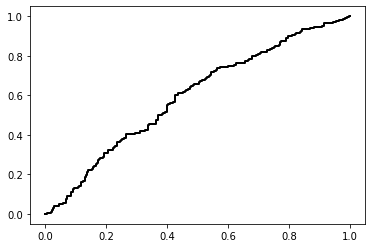

Random Data, horizon 60
AUC good =  0.5898232901093313


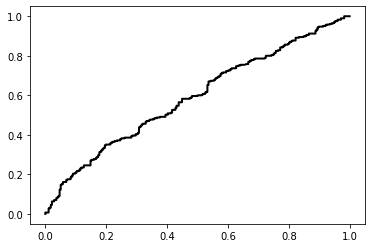

C =  1.0
Real_data_accuracy   :  0.5615
Random data_accuracy :  0.5348
Gain =  0.0267
---------------------------------------------

Real Data & Random Data Processing for horizon =  120
Alpha =  0.1
1306/1306 [==============================] - 0s 195us/sample - loss: 0.8624
Alpha =  1.0
1306/1306 [==============================] - 0s 238us/sample - loss: 4.7488
Alpha =  100.0
1306/1306 [==============================] - 0s 208us/sample - loss: 446.8240
Alpha =  1000.0
1306/1306 [==============================] - 0s 202us/sample - loss: 4461.5712
Alpha =  10.0
1306/1306 [==============================] - 0s 202us/sample - loss: 44.5679
Alpha =  0.01
1306/1306 [==============================] - 0s 237us/sample - loss: 0.3311s - loss: 0.3
Alpha =  0.0001
1306/1306 [==============================] - 0s 215us/sample - loss: 0.2498
Alpha =  0.001
1306/1306 [==============================] - 0s 198us/sample - loss: 0.2578
Real Data, horizon 120
AUC good =  0.48471998362626967


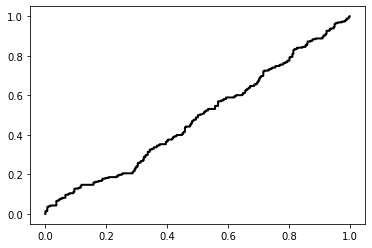

Random Data, horizon 120
AUC good =  0.5025328114206769


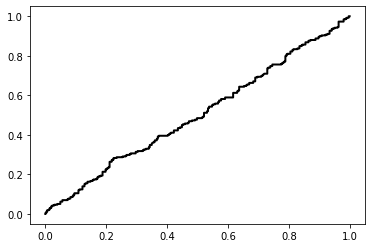

C =  1.0
Real_data_accuracy   :  0.5437
Random data_accuracy :  0.5401
Gain =  0.0036
---------------------------------------------

Real Data & Random Data Processing for horizon =  250
Alpha =  0.1
1306/1306 [==============================] - 0s 211us/sample - loss: 0.8605
Alpha =  1.0
1306/1306 [==============================] - 0s 218us/sample - loss: 4.7256
Alpha =  100.0
1306/1306 [==============================] - 0s 225us/sample - loss: 445.2845
Alpha =  1000.0
1306/1306 [==============================] - 0s 267us/sample - loss: 4499.1936 - loss: 4
Alpha =  10.0
1306/1306 [==============================] - 0s 226us/sample - loss: 45.2960
Alpha =  0.01
1306/1306 [==============================] - 0s 249us/sample - loss: 0.3283
Alpha =  0.0001
1306/1306 [==============================] - 0s 231us/sample - loss: 0.2460
Alpha =  0.001
1306/1306 [==============================] - 0s 247us/sample - loss: 0.2541
Real Data, horizon 250
AUC good =  0.5754866960450716


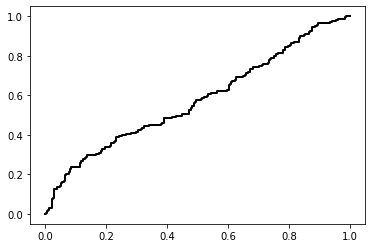

Random Data, horizon 250
AUC good =  0.7276315055502873


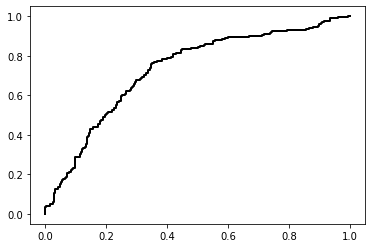

C =  0.1
Real_data_accuracy   :  0.6488
Random data_accuracy :  0.6488
Gain =  0.0
---------------------------------------------

Wall time: 2h 14min 9s


In [16]:
%%time


all_result = {}

for i in df_col:
    
    print(i)
    
    sub_result = {}
    
    for j in td:
        
        maxval = -10000.0
        c = 0.0
        sval = 0.0
                
        y_col = str(i)+"_"+str(j)+"_y"
        p_col = str(i)+"_p"
        v_col = str(i)+"_v"
                
        X = df.drop([y_col,p_col,v_col, "date","month","week","index"], axis = 1)
        y = df[y_col]
        
        r_X = r_df.drop([y_col,p_col,v_col,"date","month","week","index"], axis = 1)
        r_y = r_df[y_col]
                
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                            test_size=0.3,
                                                            random_state=0)
        
        r_X_train, r_X_test, r_y_train, r_y_test = train_test_split(r_X, r_y, 
                                                            test_size=0.3,
                                                            random_state=0)
        
        sc = StandardScaler()
        sc.fit(X_train)
        X_train_std = sc.transform(X_train)
        X_test_std = sc.transform(X_test)
        
        r_sc = StandardScaler()
        r_sc.fit(r_X_train)
        r_X_train_std = r_sc.transform(X_train)
        r_X_test_std = r_sc.transform(X_test)
        
        
        print("Real Data & Random Data Processing for horizon = ",j)
        
        
        real_model = Sequential()
        random_model = Sequential()  
        
  
        for reg in {0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0}:
            
                        
            # 2 hidden layers {100,100}
            # KOR ETF Dataset's input_dim = 101
            print ("Alpha = ", reg)
            
            model = Sequential()
            model.add(Dense(100, input_dim=101, kernel_initializer='uniform',
                            kernel_regularizer=regularizers.l2(reg),
                            activation='relu'))
            model.add(Dense(100, kernel_initializer='uniform', activation='relu'))
            model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
            sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True, clipnorm=1.)
            model.compile(loss='mean_squared_error', optimizer=sgd, )
            
            nmodel = Sequential()
            nmodel.add(Dense(100, input_dim=101, kernel_initializer='uniform',
                             activation='relu', 
                             kernel_regularizer=regularizers.l2(reg)))
            nmodel.add(Dense(100, kernel_initializer='uniform', activation='relu'))
            nmodel.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
            sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True, clipnorm=1.)
            nmodel.compile(loss='mean_squared_error', optimizer=sgd)
            
               
            model.fit(np.array(X_train_std), np.array(y_train), epochs=1,batch_size=100)
            real_eval = model.evaluate(np.array(X_train_std), np.array(y_train))
            
            nmodel.fit(np.array(r_X_train_std), np.array(y_train), epochs=1,batch_size=100)
            random_eval = model.evaluate(np.array(r_X_train_std), np.array(y_train))
            
            dfr = real_eval - random_eval
            sval = sval+dfr
            if maxval<dfr:
                maxval = dfr
                c = reg
                real_model = model
                random_model = nmodel
                
            
        predictions = real_model.predict(np.array(X_test_std))                        
        probs = real_model.predict_proba(X_test_std)
        
        
        print("Real Data, horizon",j)        


        fpr, tpr, thresholds = roc_curve(y_test, probs)
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        print ("AUC good = ",roc_auc)        
        plt.plot(fpr, tpr, lw=lw, color='black')
        #plt.title("Horizon = "+str(filename))
        plt.show()


        print("Random Data, horizon",j)

        r_predictions = random_model.predict(np.array(r_X_test_std))            
        r_probs = random_model.predict_proba(r_X_test_std)

        fpr, tpr, thresholds = roc_curve(y_test, r_probs)
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        print ("AUC good = ",roc_auc)        
        plt.plot(fpr, tpr, lw=lw, color='black')
        #plt.title("Horizon = "+str(filename))
        plt.show()

        for k in range(len(predictions)):
 
            if predictions[k] > 0.5:
                predictions[k] = 1
            else:
                predictions[k] = 0
                
                

        for l in range(len(r_predictions)):
    
            if r_predictions[l] > 0.5:
                r_predictions[l] = 1
            else:
                r_predictions[l] = 0

        print ("C = ",c)
        real_accuracy = round(metrics.accuracy_score(y_test, predictions),4)
        random_accuracy = round(metrics.accuracy_score(r_y_test, r_predictions),4)

        print("Real_data_accuracy   : ", real_accuracy)
        print("Random data_accuracy : ", random_accuracy)

        gain = (real_accuracy - random_accuracy)

        print ("Gain = ",round(gain,4))
        print ("---------------------------------------------\n")

        v_real_accuracy = str(j) + "_real_accuracy"
        v_random_accuracy = str(j) + "_random_accuracy"
        v_gain = str(j) +"_gain"

        sub_result[v_real_accuracy] = real_accuracy 
        sub_result[v_random_accuracy] = random_accuracy
        sub_result[v_gain] = gain

    all_result[i] = sub_result

In [17]:
final_results = pd.DataFrame(all_result)

In [18]:
final_results

,KOD,KBS,TIG
1_real_accuracy,0.5045,0.5455,0.5134
1_random_accuracy,0.5258,0.5472,0.4581
1_gain,-0.0213,-0.0017,0.0553
3_real_accuracy,0.5187,0.6435,0.4742
3_random_accuracy,0.5241,0.6435,0.4902
3_gain,-0.0054,0.0000,-0.0160
5_real_accuracy,0.5579,0.6791,0.5455
5_random_accuracy,0.5633,0.6791,0.5276
5_gain,-0.0054,0.0000,0.0179
10_real_accuracy,0.5561,0.6970,0.5312


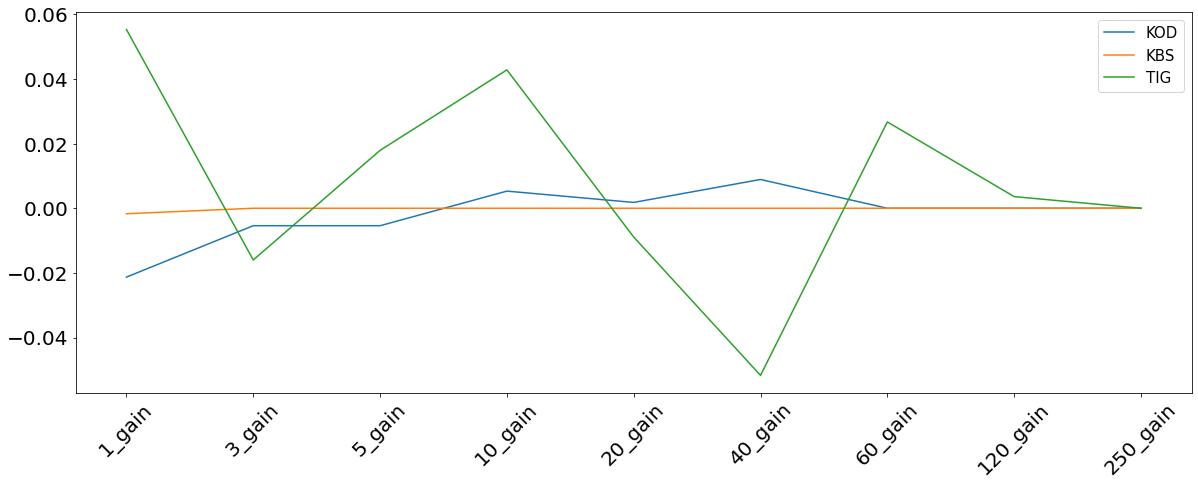

In [19]:
plt.figure(figsize = (20,7))
plt.plot(final_results[final_results.index.str.contains('gain')])
plt.xticks(rotation = 45, fontsize = 20)
plt.legend(final_results.columns, fontsize=15)
plt.yticks(fontsize = 20)
plt.show()

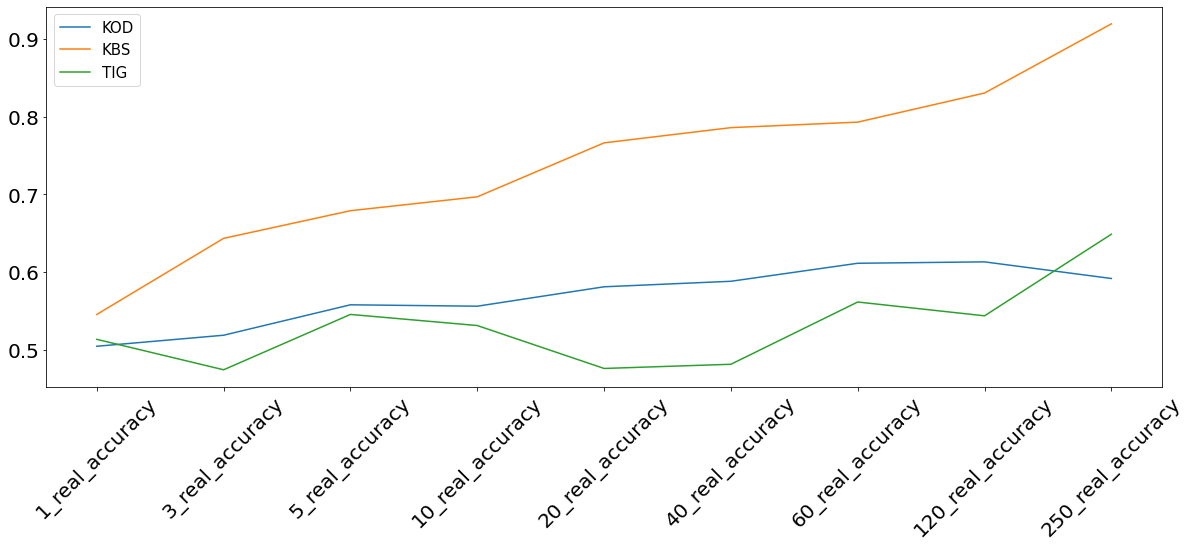

In [20]:
plt.figure(figsize = (20,7))
plt.plot(final_results[final_results.index.str.contains('real_accuracy')])
plt.xticks(rotation = 45, fontsize = 20)
plt.legend(final_results.columns, fontsize=15)
plt.yticks(fontsize = 20)
plt.show()